In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)
df.rename(columns=lambda x: x.strip())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
print(df.readmitted.value_counts())

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [4]:
df = df.drop(df[df.readmitted == '>30'].index)
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
df.dropna(axis=1, how='all')
y = df['readmitted']
X = df.drop('readmitted', axis=1)
X = pd.get_dummies(df)

In [5]:
X.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_NO
0,6,25,1,1,41,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,1,1,7,2,11,5,13,2,0,1,...,1,0,1,0,0,1,0,1,0,1
3,1,1,7,2,44,1,16,0,0,0,...,1,0,1,0,1,0,0,1,0,1
4,1,1,7,1,51,0,8,0,0,0,...,1,0,1,0,1,0,0,1,0,1
6,3,1,2,4,70,1,21,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66221 entries, 0 to 101765
Data columns (total 45 columns):
race                        66221 non-null object
gender                      66221 non-null object
age                         66221 non-null object
admission_type_id           66221 non-null int64
discharge_disposition_id    66221 non-null int64
admission_source_id         66221 non-null int64
time_in_hospital            66221 non-null int64
num_lab_procedures          66221 non-null int64
num_procedures              66221 non-null int64
num_medications             66221 non-null int64
number_outpatient           66221 non-null int64
number_emergency            66221 non-null int64
number_inpatient            66221 non-null int64
diag_1                      66221 non-null object
diag_2                      66221 non-null object
diag_3                      66221 non-null object
number_diagnoses            66221 non-null int64
max_glu_serum               66221 non-null object
A

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # X_train, X_test, y_train, y_test = train_test_split(
# #         X, y, test_size = 0.5, random_state=42)

# numeric_headers = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]
# categorical_headers = ['race',
#  'gender',
#  'age',
#  'admission_type_id',
#  'discharge_disposition_id',
#  'admission_source_id',
#  'diag_1',
#  'diag_2',
#  'diag_3',
#  'max_glu_serum',
#  'A1Cresult',
#  'metformin',
#  'repaglinide',
#  'nateglinide',
#  'chlorpropamide',
#  'glimepiride',
#  'acetohexamide',
#  'glipizide',
#  'glyburide',
#  'tolbutamide',
#  'pioglitazone',
#  'rosiglitazone',
#  'acarbose',
#  'miglitol',
#  'troglitazone',
#  'tolazamide',
#  'examide',
#  'citoglipton',
#  'insulin',
#  'glyburide-metformin',
#  'glipizide-metformin',
#  'glimepiride-pioglitazone',
#  'metformin-rosiglitazone',
#  'metformin-pioglitazone',
#  'change',
#  'diabetesMed']
# for col in numeric_headers:
#     X[col] = X[col].astype(np.float)
#     X[col] = X[col].astype(np.float)
    
#     ss = StandardScaler()
#     X[col] = ss.fit_transform(X[col].values.reshape(-1, 1))
#     X[col] = ss.transform(X[col].values.reshape(-1, 1))
    
# for col in categorical_headers:
#     encoder = LabelEncoder()
#     X[col] = encoder.fit_transform(X[col])

tmp = LabelEncoder()
y = tmp.fit_transform(y)

# X.head()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)

In [9]:
X_train.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_NO
100035,3,1,1,5,1,3,16,0,0,0,...,1,0,1,0,1,0,0,1,0,1
58327,1,1,7,5,46,0,17,0,0,0,...,1,0,1,0,1,0,0,1,0,1
34792,2,1,4,1,23,5,7,0,0,0,...,1,0,1,0,0,1,1,0,0,1
51717,2,3,7,7,46,0,17,0,1,5,...,1,0,1,0,1,0,0,1,1,0
38168,1,1,7,6,52,4,15,1,0,1,...,1,0,1,0,0,1,1,0,0,1


In [10]:
from sklearn import metrics as mt
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model

Using TensorFlow backend.


In [11]:
# This returns a tensor
inputs = Input(shape=(X_train.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [12]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2247)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                22480     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 22,491
Trainable params: 22,491
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train.values, y_train, epochs=10, batch_size=50, verbose=1)

from sklearn import metrics as mt
yhat = np.round(model.predict(X_test.values))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

Epoch 1/10
49665/49665 [==============================] - 5s - loss: 0.1360 - acc: 0.8324     
Epoch 2/10
49665/49665 [==============================] - 4s - loss: 0.1153 - acc: 0.8587     
Epoch 3/10
49665/49665 [==============================] - 4s - loss: 0.0904 - acc: 0.8953     
Epoch 4/10
49665/49665 [==============================] - 4s - loss: 0.0586 - acc: 0.9381     
Epoch 5/10
49665/49665 [==============================] - 4s - loss: 0.0129 - acc: 0.9941     
Epoch 6/10
49665/49665 [==============================] - 4s - loss: 0.0040 - acc: 0.9999     
Epoch 7/10
49665/49665 [==============================] - 4s - loss: 0.0026 - acc: 1.0000     
Epoch 8/10
49665/49665 [==============================] - 4s - loss: 0.0019 - acc: 1.0000     
Epoch 9/10
49665/49665 [==============================] - 5s - loss: 0.0014 - acc: 1.0000     
Epoch 10/10
49665/49665 [==============================] - 7s - loss: 0.0012 - acc: 1.0000     
[[ 2880     0]
 [    0 13676]] 1.0


In [14]:
yhat = np.round(model.predict(X_test.values))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))


[[ 2880     0]
 [    0 13676]] 1.0


## 1.A. Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

this is above

## 1.B. Identify groups of features in your data that should be combined into cross-product features. 

After looking at all the useful features in our dataset, we need to find features that can be combined into cross-product features. Unfortunately, most of the medications and illnesses in the dataset require extreme domain knowledge outside the scope of this lab. However, this still leaves us with a few options to use commmon intuition to discover features that should logically be grouped together. These include:
- [race, gender]: Rage and gender may not be the deciding factor in our model's predictions. Howectr, these two factors likely serve to give a very good rough estimate. This may be due to genetics and socioeconomic factors.
- [age, diag1]: Age and the Patient's primary diagnosis are two that seem logically grouped. The main reason someone is admitted to the hospital in the first place may have something to do with whether or not they return. Croossing this feature with age might give more importance to someone's age when determining how resilient someone is to a certain illlness (due to old or young age) and their return to the hostpital. 

## 1.C. Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Since we have reduced the dataset to a binary classification problem, we can put it simply that the importance of reducing false-negatives is significant. If we are medical preofessionals giving patients predictions on whether or not they might have somplications related to their dibetes in the future, it would be best to over-prepare the patient for the worst-case scenario (by giving them a false-positive diagnosis/result), than it would be to tell them that they are healthy, only to risk their lives by not preparing them for a future illness. Having said this, we will be implementing a Recall scoing model. This is because it is equally important whether or not the model's predictions are true-positive or true-negative, but it necessary to penalize the model for giving false-negative results that might under-prepare the patient for planning their future health.

## 1.D. Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

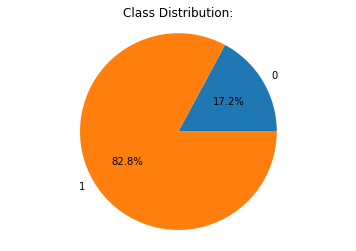

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

uniq, label = np.unique(y, return_inverse=True)

plt.pie(np.bincount(label), labels=uniq, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Distribution:')
plt.show()

Now that we understand our class distribution after looking at a visual, we can make an educated decision of how to perform cross validateion. Since we only have 2 classes, which are very unbalanced, it is statistically necessary to do a Stratified Split, since we need to make sure we get enough of each class in each split if we do a Stratified Shuffle split, and since we have over 100k records, CV time will be less, as opposed to k-fold CV.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

parameters = {'cost_fn':['quadratic','cross_entr'], 'nonlinearity':['sigmoid',], 'eta': [0.0001, 0.01, 0.1], 
              'epochs': [500], 'alpha':[0.0, 0.00001, 0.000001]}

cp = CustomPerceptron()
my_scorer = make_scorer(f1_score, average='micro')
clf = GridSearchCV(cp, parameters, scoring=my_scorer, cv=cv)
clf.fit(X, y)
results = pd.DataFrame(clf.cv_results_)

NameError: name 'CustomPerceptron' is not defined